<a href="https://colab.research.google.com/github/SusantaBanerjee/ML-College/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")  

Mounted at /content/drive


In [ ]:
#Load the dataset
from google.colab import files
uploaded = files.upload() 

Saving teleCust1000t.csv to teleCust1000t.csv


In [ ]:
df = pd.read_csv('teleCust1000t.csv')

#Print the first 5 rows of the dataframe.
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [ ]:
#Let's observe the shape(Rows, Columns) of the dataframe.
df.shape

(1000, 12)

In [ ]:
#Let's create numpy arrays for features and target
X = df.drop('custcat',axis=1).values
y = df['custcat'].values

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,12)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train,y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

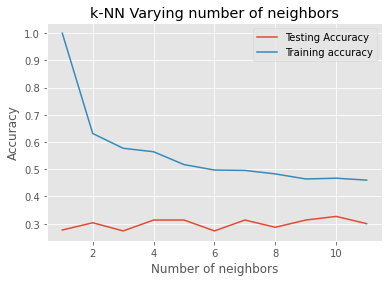

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)


In [ ]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)


0.31333333333333335

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix


In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)


In [ ]:
confusion_matrix(y_test,y_pred)


array([[33, 19, 17, 11],
       [16, 18, 20, 11],
       [28, 15, 29, 12],
       [25, 13, 19, 14]])

In [ ]:
#Confusion matrix can also be obtained using crosstab method of pandas
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,1,2,3,4,All
True,,,,,
1,33,19,17,11,80
2,16,18,20,11,65
3,28,15,29,12,84
4,25,13,19,14,71
All,102,65,85,48,300


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.32      0.41      0.36        80
           2       0.28      0.28      0.28        65
           3       0.34      0.35      0.34        84
           4       0.29      0.20      0.24        71

    accuracy                           0.31       300
   macro avg       0.31      0.31      0.30       300
weighted avg       0.31      0.31      0.31       300



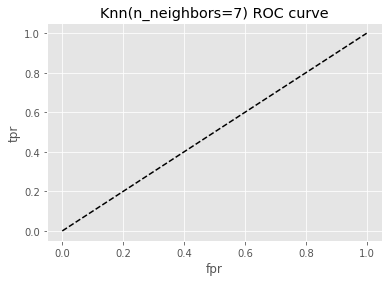

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve
plt.plot([0,1],[0,1],'k--')
#plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()
